In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error

In [55]:
df = pd.read_csv('/content/SPY.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-13,381.809998,390.390015,380.649994,385.359985,379.590698,157790000
1,2023-03-14,390.500000,393.450012,387.049988,391.730011,385.865387,149752400
2,2023-03-15,385.890015,389.489990,383.709991,389.279999,383.452057,172996900
3,2023-03-16,386.820007,396.470001,386.290009,396.109985,390.179749,143254200
4,2023-03-17,393.220001,394.399994,388.549988,389.989990,385.617523,140553400


In [56]:
df['Date'] = pd.to_datetime(df['Date'])

df = df[['Date', 'Adj Close']]
df.head()

,Date,Adj Close
0,2023-03-13,379.590698
1,2023-03-14,385.865387
2,2023-03-15,383.452057
3,2023-03-16,390.179749
4,2023-03-17,385.617523


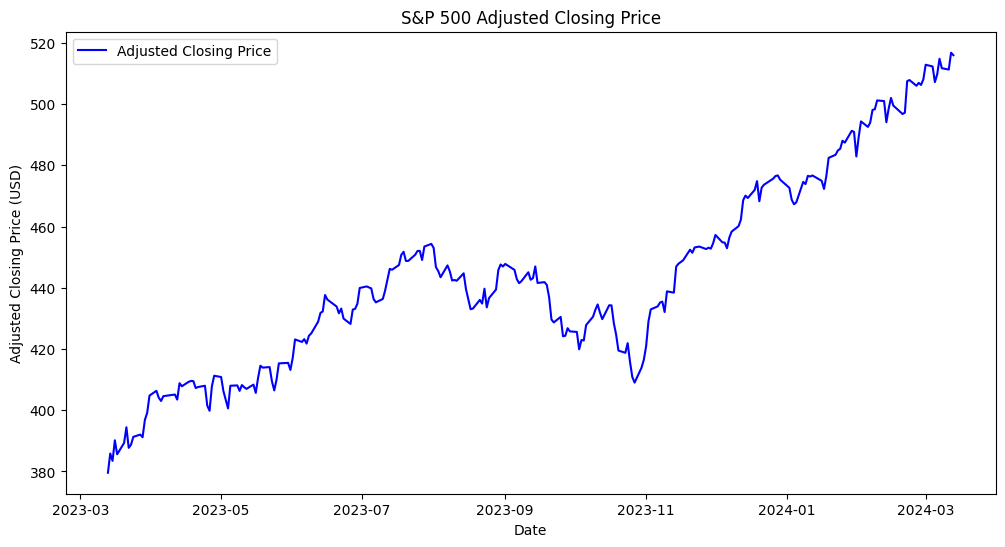

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.title('S&P 500 Adjusted Closing Price')
plt.legend()
plt.show()

In [58]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['Scaled Adj Close'] = scaler.fit_transform(df[['Adj Close']])
train = df['Scaled Adj Close'].values.reshape(-1, 1)

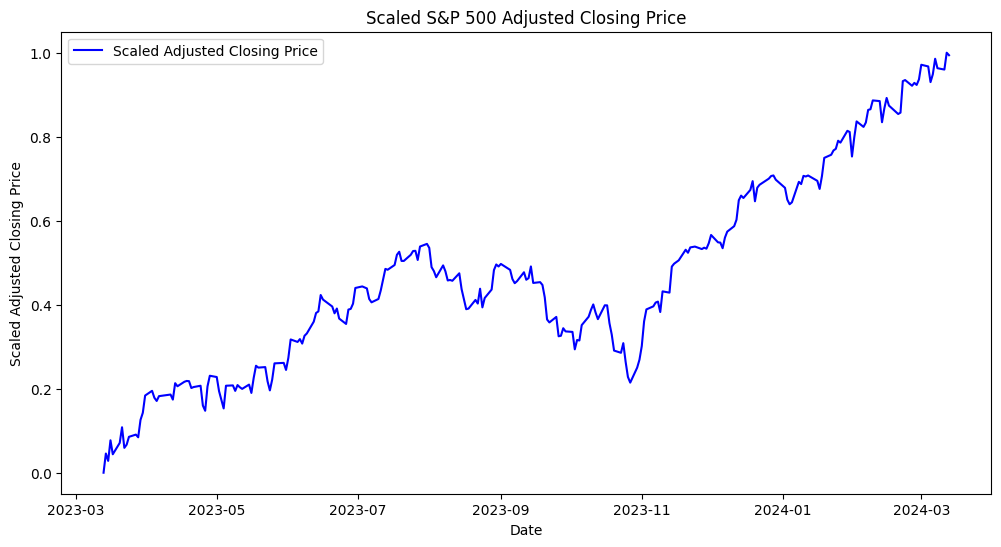

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], train, label='Scaled Adjusted Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Scaled Adjusted Closing Price')
plt.title('Scaled S&P 500 Adjusted Closing Price')
plt.legend()
plt.show()

In [60]:
X_train = []
y_train = []
for i in range(10, len(train)):
    X_train.append(train[i-10:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [61]:
X_train[:5]

array([[[0.        ],
        [0.04573744],
        [0.0281462 ],
        [0.07718567],
        [0.04393071],
        [0.07095867],
        [0.10822148],
        [0.05921049],
        [0.06685048],
        [0.08544563]],

       [[0.04573744],
        [0.0281462 ],
        [0.07718567],
        [0.04393071],
        [0.07095867],
        [0.10822148],
        [0.05921049],
        [0.06685048],
        [0.08544563],
        [0.09077928]],

       [[0.0281462 ],
        [0.07718567],
        [0.04393071],
        [0.07095867],
        [0.10822148],
        [0.05921049],
        [0.06685048],
        [0.08544563],
        [0.09077928],
        [0.08436475]],

       [[0.07718567],
        [0.04393071],
        [0.07095867],
        [0.10822148],
        [0.05921049],
        [0.06685048],
        [0.08544563],
        [0.09077928],
        [0.08436475],
        [0.1258076 ]],

       [[0.04393071],
        [0.07095867],
        [0.10822148],
        [0.05921049],
        [0.06685048],
  

In [62]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model_k = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

model.summary()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.2379
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0418
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0220
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0214
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0148
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0108
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0062
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0066
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0064
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0078
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0070
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0074
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0065
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0075
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0068
Epoch 16/100
8/8 ━━━━━━━━━━━━━━

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

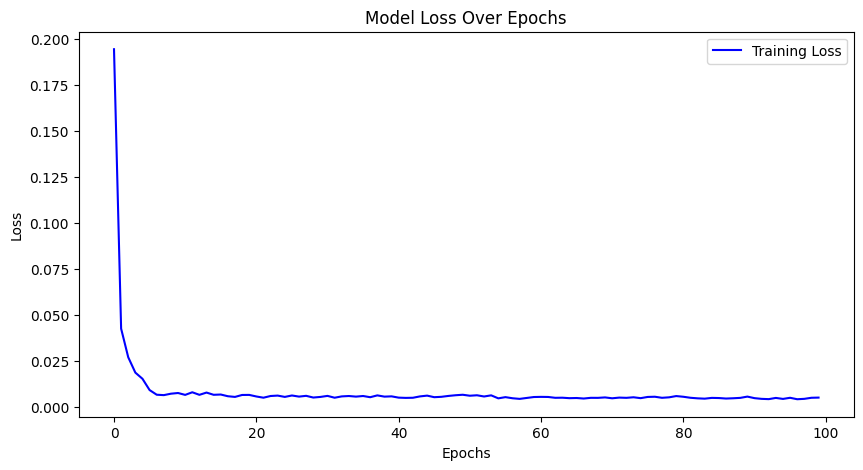

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(model_k.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

In [64]:
predictions = model.predict(X_train)
predicted_prices = scaler.inverse_transform(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


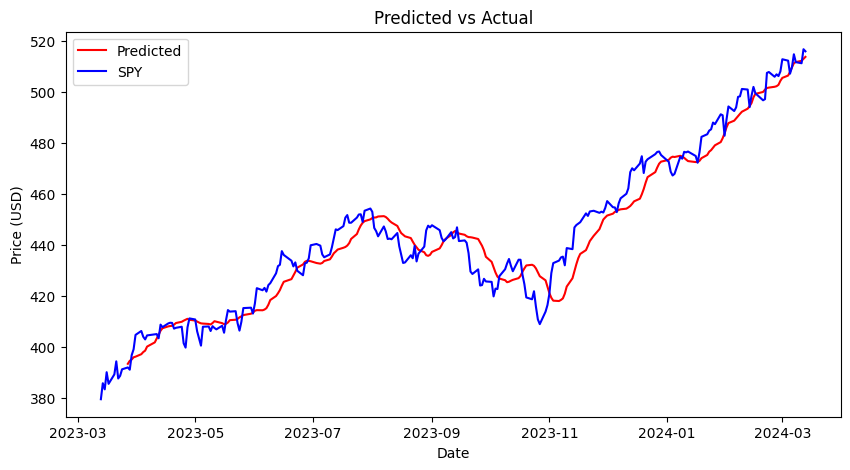

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'][10:], predicted_prices, label='Predicted', color='red')
plt.plot(df['Date'], df['Adj Close'], label='SPY', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()

In [66]:
X_train = []
y_train = []
for i in range(30, len(train)):
    X_train.append(train[i-30:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [70]:
model_30 = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model_30.compile(optimizer='adam', loss='mean_squared_error')
model_30_history = model_30.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

model_30.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.2319
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0428
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0329
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0252
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0163
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0133
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0103
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0104
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0105
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0109
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0109
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0092
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0100
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0094
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0078
Epoch 16/100
7/7 ━━

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 30, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 30, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

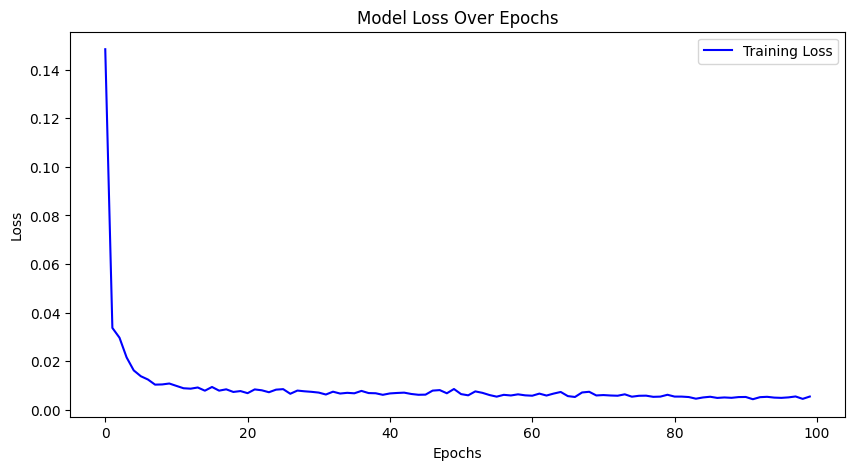

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(model_30_history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step


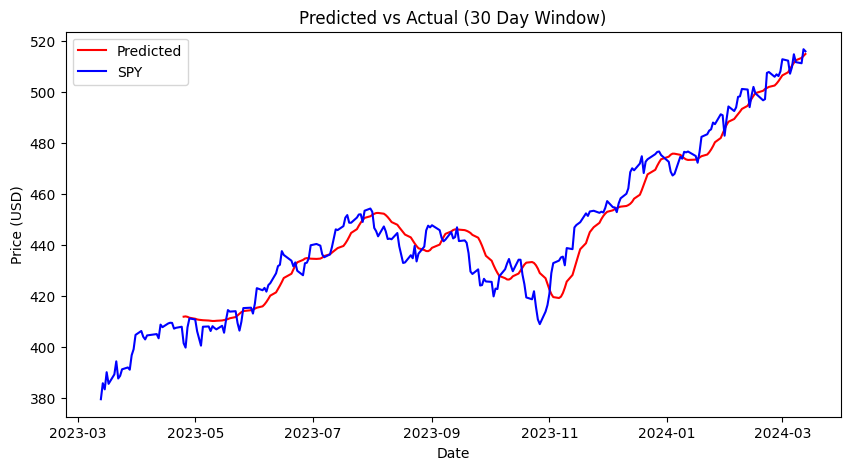

In [72]:
predictions_30 = model_30.predict(X_train)
predicted_prices_30 = scaler.inverse_transform(predictions_30)

plt.figure(figsize=(10, 5))
plt.plot(df['Date'][-len(predicted_prices_30):], predicted_prices_30, label='Predicted', color='red')
plt.plot(df['Date'], df['Adj Close'], label='SPY', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Predicted vs Actual (30 Day Window)')
plt.legend()
plt.show()

There doesn't appear to be a difference between graphs

In [73]:
mse_loss = np.zeros(len(df))

for i in range(30, len(df)):
    mse_loss[i] = mean_squared_error([df['Adj Close'].iloc[i]], [predicted_prices_30[i-30]])

df['mse_loss'] = mse_loss

average_mse = df['mse_loss'][30:].mean()
df['anomaly'] = df['mse_loss'] > 3 * average_mse

df.head()

,Date,Adj Close,Scaled Adj Close,mse_loss,anomaly
0,2023-03-13,379.590698,0.000000,0.0,False
1,2023-03-14,385.865387,0.045737,0.0,False
2,2023-03-15,383.452057,0.028146,0.0,False
3,2023-03-16,390.179749,0.077186,0.0,False
4,2023-03-17,385.617523,0.043931,0.0,False


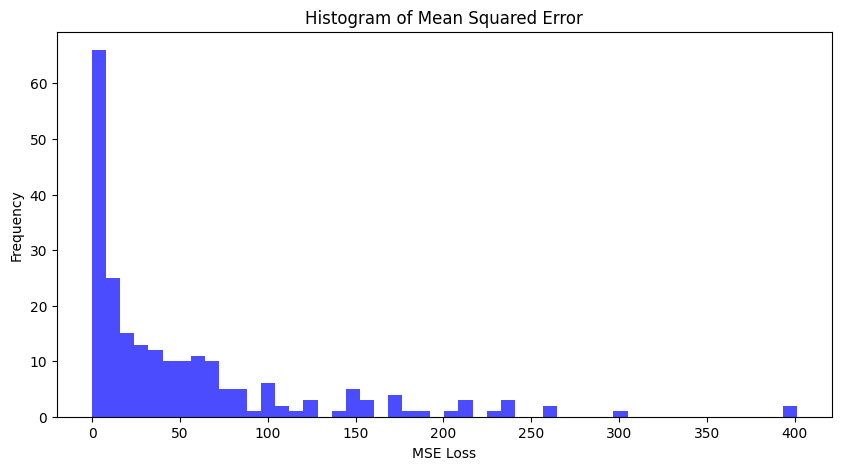

In [74]:
plt.figure(figsize=(10, 5))
plt.hist(df['mse_loss'][30:], bins=50, color='blue', alpha=0.7)
plt.xlabel('MSE Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Squared Error')
plt.show()

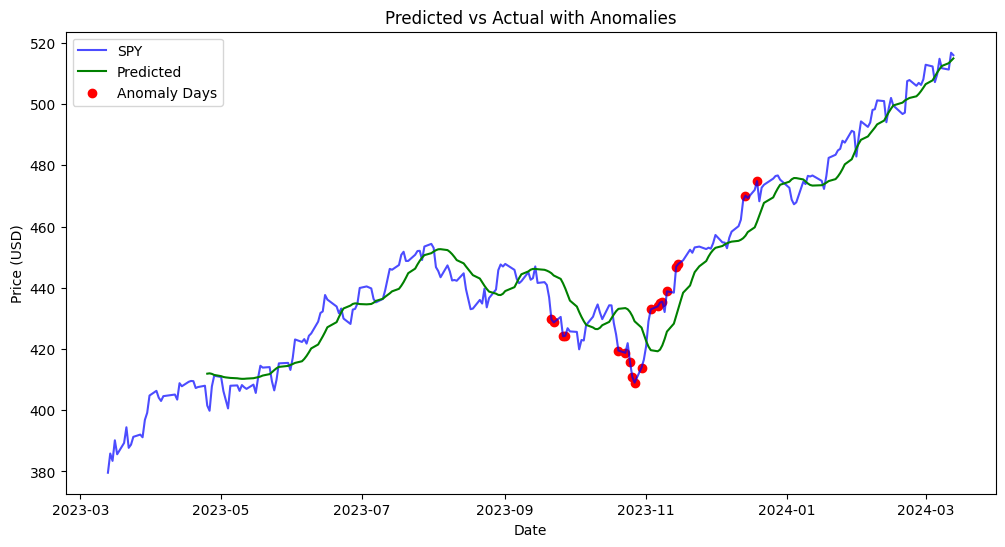

In [75]:
predicted_prices = predicted_prices.flatten()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='SPY', color='blue', alpha=0.7)
plt.plot(df['Date'][30:], predicted_prices_30[:len(df['Date'][30:])], label='Predicted', color='green')
plt.scatter(df[df['anomaly']]['Date'], df[df['anomaly']]['Adj Close'], color='red', label='Anomaly Days', marker='o')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Predicted vs Actual with Anomalies')
plt.legend()
plt.show()

In [76]:
print(df.columns)

Index(['Date', 'Adj Close', 'Scaled Adj Close', 'mse_loss', 'anomaly'], dtype='object')


In [77]:
df_aligned = df.iloc[30:].copy()
df_aligned['Predicted'] = predicted_prices_30

In [78]:
df_aligned['above_below'] = df_aligned['Adj Close'] - df_aligned['Predicted']

In [79]:
for i in range(1, len(df_aligned)):
    if df_aligned['above_below'].iloc[i-1] < 0 and df_aligned['above_below'].iloc[i] >= 0:
        print(f"Buy on {df_aligned['Date'].iloc[i].date()}")
    elif df_aligned['above_below'].iloc[i-1] > 0 and df_aligned['above_below'].iloc[i] <= 0:
        print(f"Sell on {df_aligned['Date'].iloc[i].date()}")

Buy on 2023-05-18
Sell on 2023-05-23
Buy on 2023-05-26
Sell on 2023-05-31
Buy on 2023-06-01
Sell on 2023-06-23
Buy on 2023-06-30
Sell on 2023-07-07
Buy on 2023-07-11
Sell on 2023-07-27
Buy on 2023-07-28
Sell on 2023-08-02
Buy on 2023-08-28
Sell on 2023-09-07
Buy on 2023-09-14
Sell on 2023-09-15
Buy on 2023-10-09
Sell on 2023-10-18
Buy on 2023-11-02
Sell on 2023-12-06
Buy on 2023-12-07
Sell on 2024-01-02
Buy on 2024-01-10
Sell on 2024-01-17
Buy on 2024-01-18
Sell on 2024-01-31
Buy on 2024-02-01
Sell on 2024-02-13
Buy on 2024-02-14
Sell on 2024-02-16
Buy on 2024-02-22
Sell on 2024-03-05
Buy on 2024-03-07
Sell on 2024-03-08
Buy on 2024-03-12


In [80]:
df_aligned['diff'] = np.where(df_aligned['above_below'] > 0, 1, -1)

In [84]:
df_aligned['action'] = np.where(df_aligned['diff'] == 1, 'sell', 'buy')

print(df_aligned[['Date', 'Adj Close', 'Predicted', 'above_below', 'diff', 'action']].head(5))

         Date   Adj Close   Predicted  above_below  diff action
30 2023-04-25  401.527130  411.942505   -10.415375    -1    buy
31 2023-04-26  399.826385  412.051941   -12.225556    -1    buy
32 2023-04-27  407.786163  411.879608    -4.093445    -1    buy
33 2023-04-28  411.266693  411.528992    -0.262299    -1    buy
34 2023-05-01  410.851410  411.132721    -0.281311    -1    buy


In [86]:
print(df_aligned['diff'].diff()[df_aligned['diff'].diff() != 0].index.values)

[ 30  47  50  53  55  56  71  76  80  82  94  95  98 116 123 128 129 145
 152 163 186 187 203 209 213 214 223 224 232 233 235 238 246 248 249 251]


In [88]:
df_aligned.set_index('Date', inplace=True)

change = df_aligned['diff'].diff()[df_aligned['diff'].diff() != 0]

In [90]:
for date in change.index:
    previous_date = date - pd.Timedelta(days=1)

    if previous_date in df_aligned.index:
        if df_aligned.loc[date, 'diff'] == -1 and df_aligned.loc[previous_date, 'diff'] == 1:
            print(f"Buy on {date.date()}")
        elif df_aligned.loc[date, 'diff'] == 1 and df_aligned.loc[previous_date, 'diff'] == -1:
            print(f"Sell on {date.date()}")

Sell on 2023-05-18
Buy on 2023-05-23
Sell on 2023-05-26
Buy on 2023-05-31
Sell on 2023-06-01
Buy on 2023-06-23
Sell on 2023-06-30
Buy on 2023-07-07
Sell on 2023-07-11
Buy on 2023-07-27
Sell on 2023-07-28
Buy on 2023-08-02
Buy on 2023-09-07
Sell on 2023-09-14
Buy on 2023-09-15
Buy on 2023-10-18
Sell on 2023-11-02
Buy on 2023-12-06
Sell on 2023-12-07
Sell on 2024-01-10
Buy on 2024-01-17
Sell on 2024-01-18
Buy on 2024-01-31
Sell on 2024-02-01
Buy on 2024-02-13
Sell on 2024-02-14
Buy on 2024-02-16
Sell on 2024-02-22
Buy on 2024-03-05
Sell on 2024-03-07
Buy on 2024-03-08
Sell on 2024-03-12
